# CSCI 2000U - Scientific Data Analysis
## Final Project - Group 1

Group Members:
Russell Ngo - 100791124,
Fadi Chamas - 100787929,
Maxwell Lin - 100697588,

**Due date:** Dec 6th 11:59PM via Canvas.

## Introduction
Since the dawn of the era of smartphones and the Internet of Things, mobile and wireless devices and technologies have not only caught the attention of the mainstream media, but allowed computing as a whole to obtain mainstream acceptance. In addition, due to the simplicity of smartphones, they are easily accessible. Due to both these changes, the entire world of software development was dealt with an influx of users. With such a large number of entries, and a theme that is currently on everybody’s mind, it was a no-brainer to choose a dataset that had a relation to mobile devices. Therefore, it was decided that the “Google Play Store Apps” dataset would be chosen for this project. The Google Play Store comes preinstalled with every mobile device that is running any version of the Android operating system. In addition, the Google Play Store is generally needed to install any application that is not already preinstalled on the device. Therefore, it can be assumed that the Google Play Store itself is one of -- if not the -- most used applications available for Android devices. Furthermore, a large number of users and daily interactivity that takes place with the Google Play Store leads to a large amount of data being available for analysis. For example, questions such as “Which application category has the most reviews?”, “What categories have the most applications?”, and “How many applications are there in each content rating?” can be answered in order to find the most popular combination of characteristics in an application. In addition, the answers “Is there a correlation between reviews and installs?”, and “Does the price type vary with content rating?“ can be used to find trends that can help aspiring developers advertise, promote, and price their application accordingly. To conclude, this dataset was chosen due to the fact that the application this dataset is based upon has a large scope of users and the conclusions that can be drawn from this dataset are relevant to society as a whole. 

## Description of Data
This is a compilation of data for 10,000 android apps available for download on the Google Play Store (or formerly known as the Android Market). The data was obtained by web-scraping the Google Play Store and was then stored in .csv format. The dataset is licensed under the Creative Commons Attribution 3.0 Unported License. It was originally created on September 4, 2018 and last updated on February 3, 2019.

## Analysis of the Data
The dataset contains applications and 13 of their attributes. They are defined as follows.
| Attribute | Description|
| :- | :- |
| App | the application’s name/title |
| Category | how the application is categorized within the Google Play Store |
| Rating | overall user rating of the application in the Google Play Store |
| Reviews| total number of reviews submitted by Google Play Store Users for the application |
| Size | amount of storage space in bytes the application needs to be available in order to be installed |
| Installs | number of Google Play Store users who downloaded the application |
| Type | whether the application is free or needs a fee to be paid in order to be downloaded (entries are either “Paid” or “Free” under this attribute) |
| Price | the price of the application (“0” if free) |
| Content Rating| the age groups the application targets |
| Genre | the genre the application belongs to |
| Last Updated | date the application was last updated |
| Current Ver | current version of the application that is available for installation on the Google Play Store |
| Android Ver | the minimum version of Android OS needed to install the application from the Google Play Store |

***
The dataset is usable in terms of analysis after data cleaning takes place. However, there are many flaws when it comes to reading what it has to offer. In nearly all columns, there are inputs that do not fit certain categories and some data have missing columns, such as missing ‘Reviews’.
***
The size entries are the most unclear as their data  comes paired with a 'k' or 'M'. The sizes will be stored as type float. We interpreted ‘k’ as a short form for “kilobytes”, so we will convert the sizes with this suffix to bytes by multiplying by 1024. We also interpreted ‘m’ as megabytes and will convert the size by multiplying by 1024^2. Another concern is the input ‘Varies with device’, which is understandable but may cause our conclusions to be less accurate. Entries under this input will end up being dropped when data cleaning takes place.
***
The rating column has a minor issue, where some values are labeled as ‘NaN’. These entries shall be removed as to not interfere with the data analysis. 
***
Another column of concern is the install column, which contains vague parameters instead of a solid integer and contains a '+'. The ‘+’ character will be dropped and the values will be stored as integers. However, this can make conclusions that use this column imprecise. The column also has some inputs that are entered as ‘Free’, which seems like an error made by the web scraper. These entries will be dropped when data cleaning takes place.
***
The maturity rating has a small issue, where one input is blank. This should be fixed by combining it with the ‘unrated’ input, making all apps in either category fall under a new ‘unrated and unknown’ category. 
***
The data type of price also has a small issue, where there are apps that are labeled ‘0’. This should be combined with the ‘Free’ category. There is also the ‘NaN’ category in this column, but no changes can be made to it until it is better understood.
***
Finally, the price entries need the '$' symbol removed and the inputs turned into floats. Some of the entries are stored as ‘Everyone’ and these entries will end up dropped when data cleaning takes place.


## Exploratory Data Analysis

The block below imports libaries we thought were necessary or would come in handy.

In [4]:
import csv
import re
import numpy as np
import pandas as pd
from functools import reduce

import calendar
import string
from math import sqrt

import matplotlib.pyplot as plt
import sys
import seaborn as sns

Our next step was to filter out the good data from the bad data.

In [5]:
def get_data_csv():
    collection = []
    bad_data = []
    with open('googleplaystore.csv', 'r', encoding='utf-8') as f:
        for line in csv.DictReader(f):
            try:
                has_none = False
                for key,value in line.items():
                    if value == None:
                        raise Exception('')
                # the following steps are the cleaning process for the dataset 
                line['Rating'] = float(line['Rating'])

                line['Reviews'] = int(line['Reviews'])
                # we convert the 'Rating' column from str to float 
                # and convert 'Reviews' column from str to int

                size_unit = line['Size'][-1]
                mutiplier = 1
               
                
                if size_unit.upper() == 'M':
                    mutiplier = 1024 * 1024
                elif size_unit.upper() == 'K':
                    mutiplier = 1024
                # there are 'k' and ' M' in 'Size' coumn, beacause this
                # is the size of an software, then we convert 
                # 'k' to '*1024' and 'M' to '1024'
                else:
                    line['Size'] = '-1s'
                line['Size'] = float(line['Size'][:-1]) * mutiplier 

                line['Installs'] = int(line['Installs'][:-1].replace(',', ''))
                # there is '+' at the end of data in 'Installs' column, 
                # we convert 'number+' to 'number * 1'
                
                if line['Price'] == '0':
                    line['Price'] = 0
                else:
                    line['Price'] = float(line['Price'][1:])
                # we change the data type in 'Price' column from str to int
                collection.append(line)
            except:
                bad_data.append(line)
                # because there are some data have missing concept, then
                # we stored these missing data into  bad_data
        return collection,bad_data


#at last, we convert all the data to int or float and ignore bad data
#this is convenient for us to calculate the following data 


# do not run the plot code more than once 
# if the code is run more than once, the size of each content label
# will explode, if this situation happened, restart the kernel
# we didn't know what's wrong with this situation 
    
    
# the data
data, bad_data = get_data_csv()
print(len(data)) # good inputs
print(len(bad_data)) # bad inputs
print(type(data)) # data type

# check if pandas works
data_frame = pd.read_csv("googleplaystore.csv")
data_frame.head()

10839
2
<class 'list'>


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now that our data is clean, we may begin to perform the valuable exploratory data analysis.

{'ART_AND_DESIGN': 1714440, 'AUTO_AND_VEHICLES': 1163666, 'BEAUTY': 396240, 'BOOKS_AND_REFERENCE': 21959069, 'BUSINESS': 13954552, 'COMICS': 3383276, 'COMMUNICATION': 815462260, 'DATING': 7291278, 'EDUCATION': 39595786, 'ENTERTAINMENT': 59178154, 'EVENTS': 161018, 'FINANCE': 17550728, 'FOOD_AND_DRINK': 8883330, 'HEALTH_AND_FITNESS': 37893743, 'HOUSE_AND_HOME': 3976385, 'LIBRARIES_AND_DEMO': 1037118, 'LIFESTYLE': 12882784, 'GAME': 1585422349, 'FAMILY': 410226330, 'MEDICAL': 1585975, 'SOCIAL': 621241422, 'SHOPPING': 115041222, 'PHOTOGRAPHY': 213516650, 'SPORTS': 70830169, 'TRAVEL_AND_LOCAL': 62617919, 'TOOLS': 273185044, 'PERSONALIZATION': 89346140, 'PRODUCTIVITY': 114116975, 'PARENTING': 958331, 'WEATHER': 14604735, 'VIDEO_PLAYERS': 110380188, 'NEWS_AND_MAGAZINES': 54400863, 'MAPS_AND_NAVIGATION': 30659254}
GAME


<AxesSubplot:xlabel='Category'>

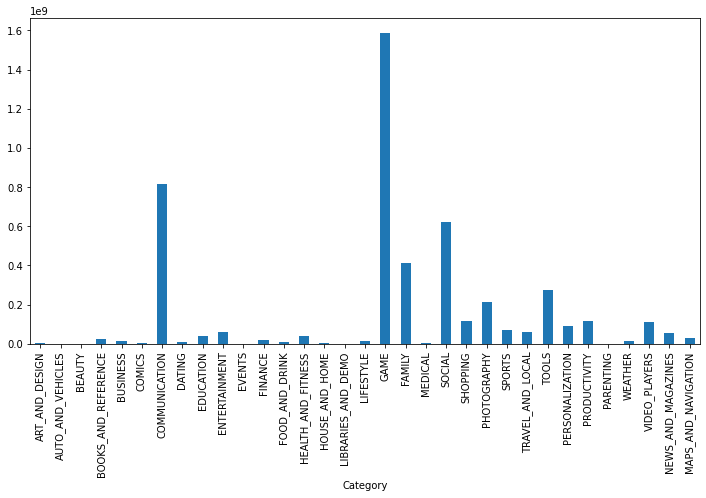

In [3]:
# Q1 Which category has the most reviews?
review_count = {}
for app in data:
    category = app['Category']
    reviews = app['Reviews']
    if category in review_count:
        review_count[category] += reviews
    else:
        review_count[category] = reviews 
# this is used to find the category with the highest reviews


print(review_count)
max_review_category = max(review_count, key=review_count.get)
print(max_review_category) # print category data

# Reviews per Category
df1 = pd.Series(review_count)
df1.index.name = 'Category'
df1.plot(kind='bar', figsize=(12,6), x="Category")

We selected the reviews category instead of the installations category because we determined that reviews are a better way of proving the usage of an app, since people who use the app would give feedback, regardless of an app’s quality. 
The category with the most reviews is the game category, with communication being second and social category coming in third. The mobile gaming industry has gotten bad press recently for designing games that make users likely to develop an addiction, so this finding is not surprising at all in this context alone. However, the majority of mobile devices were initially designed with the intention to communicate and socialize, and with this new context, it is surprising that Games have more total reviews than Communication and Social combined. 

In [4]:
# Q2 Does the install count of an app relate to its reviews?
from scipy.stats import pearsonr

# correlation of reviews  and installs
corr, _ = pearsonr(list(map(lambda j: j["Reviews"], data)), list(map(lambda j: j["Installs"], data)))
print('Pearsons correlation: %3f' % corr)

Pearsons correlation: 0.643121


Our calculations indicate that there is a moderate to strong positive correlation (0.643121) between reviews and installs. This means that people do care about the reviews of an app. What most likely occurs is that when it comes to applications that are not widely known, users look at the reviews of the application and decide whether or not the application is worth installing or not, due to the limited amount of space that every storage disk or drive has. However, when it comes to applications that are widely known, the users will install the application even if the application has poor reviews because they are already familiar with the application and it’s brand.

Everyone           8019
Teen               1156
Everyone 10+        380
Mature 17+          479
Adults only 18+       3
Unrated               2
dtype: int64


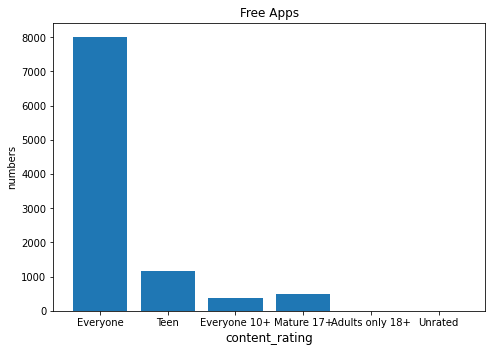

Everyone        695
Mature 17+       20
Teen             52
Everyone 10+     33
dtype: int64


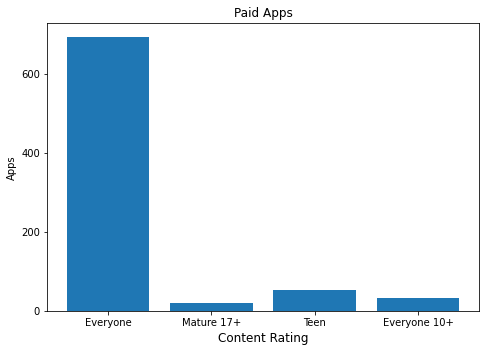

In [4]:
# Q3 Does maturity/content rating relate to whether an app is paid for?
price_rating = list(map(lambda x: (x["Price"], x["Content Rating"]), data))

# free app information
free_app = list(filter(lambda x: x[0] == 0,price_rating))

count_dict_free = {}
for app in free_app:
    count_dict_free[app[1]] = 0
for app in free_app:
    count_dict_free[app[1]] += 1        

df_free_app = pd.Series(count_dict_free)
print(df_free_app) # free app statistics

# plot graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
content_rating = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+','Unrated']
numbers = [8019,1156,380,479,3,2]
ax.bar(content_rating,numbers)
plt.title('Free Apps')
ax.set_xlabel('content_rating', fontsize = 12)
ax.set_ylabel('numbers', fontsize = 10)
plt.show()

# paid app information
paid_app = list(filter(lambda x: x[0] > 0,price_rating))

count_dict_paid = {}
for app in paid_app:
    count_dict_paid[app[1]] = 0
for app in paid_app:
    count_dict_paid[app[1]] += 1        

df_paid_app = pd.Series(count_dict_paid)
print(df_paid_app)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
content_rating = ['Everyone', 'Mature 17+', 'Teen', 'Everyone 10+']
numbers = [695,20,52,33]
ax.bar(content_rating,numbers)
plt.title('Paid Apps')
plt.rc('xtick', labelsize=200) 
plt.rc('ytick', labelsize=20) 
ax.set_xlabel('Content Rating', fontsize = 12)
ax.set_ylabel('Apps', fontsize = 10)
plt.show()

We can conclude that there is no variation that is not negligible between prices and content rating. This implies that developers price their application on how much they think it’s worth, rather than how much they think their target audience can spend.

<AxesSubplot:title={'center':'Apps per Category'}, xlabel='Category', ylabel='Reviews'>

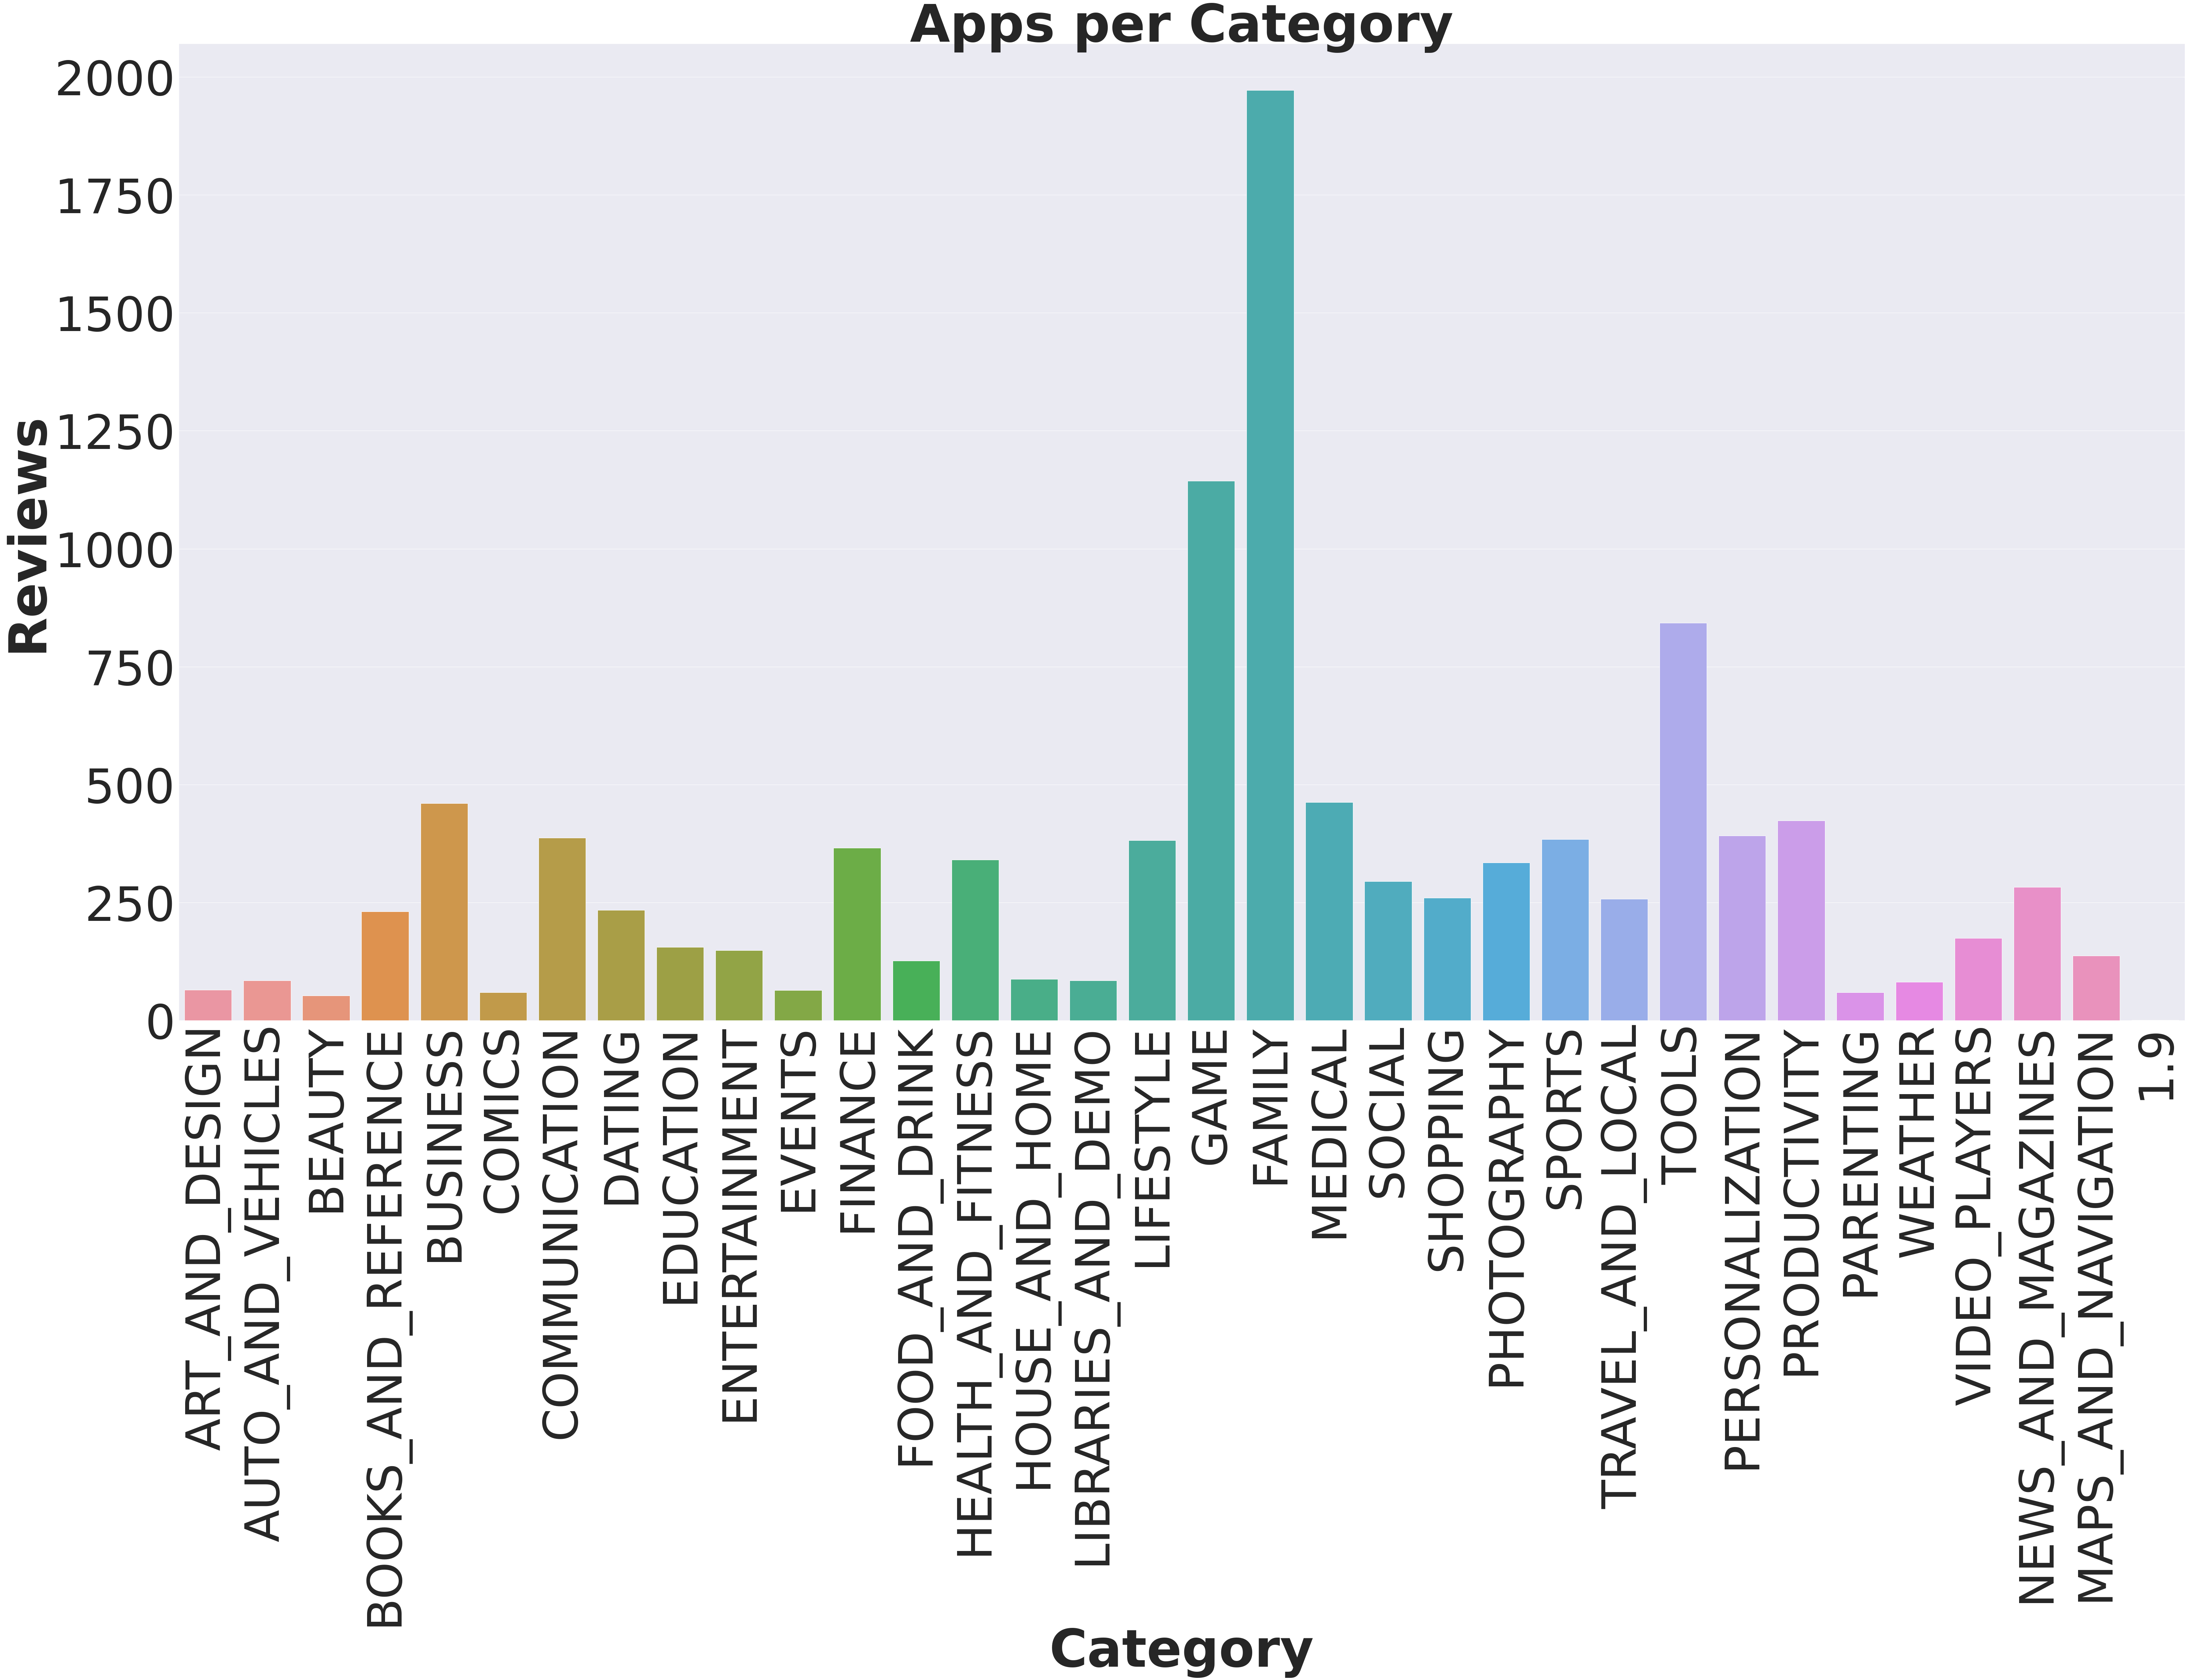

In [9]:
# How many apps are there in each category?
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

info = get_data_csv('googleplaystore.csv')

playstore_df = pd.DataFrame(info) # initialize pandas dataframe
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='ignore') # convert review data from string to int

plt.figure(figsize=(100,50)) # determine plot size
sns.set(font_scale = 12) # https://www.delftstack.com/howto/seaborn/seaborn-font-size/#:~:text=We%20can%20change%20the%20configurations,the%20axis%20labels%20and%20everything.
c = sns.countplot(x=playstore_df["Category"], data=playstore_df["Reviews"].value_counts()) # initialize plot
plt.title('Apps per Category', weight = 'bold') # 'weight' can make chart and axis titles stand out
plt.xlabel('Category', weight = 'bold')
plt.ylabel('Reviews', weight = 'bold')
# plt.xticks(np.arange(len(playstore_df["Category"].unique())), playstore_df["Category"].unique()) # unnecessary code
c.set_xticklabels(c.get_xticklabels(), rotation = 90) # rotates x-axis labels 90 degrees
c # return plot

The most used categories are ‘Family’, ‘Game’, and ‘Tools’. It could be presumed that applications are categorized within the ‘Family’ category in order to encourage users with families to download apps. However, another conclusion with a more malicious intent behind it is that, developers categorize their game as ‘Family’ in order to appear family-friendly and leave their application open for children to install. 

/home/russellngo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Apps per Content Rating'}, xlabel='Content Rating', ylabel='Reviews'>

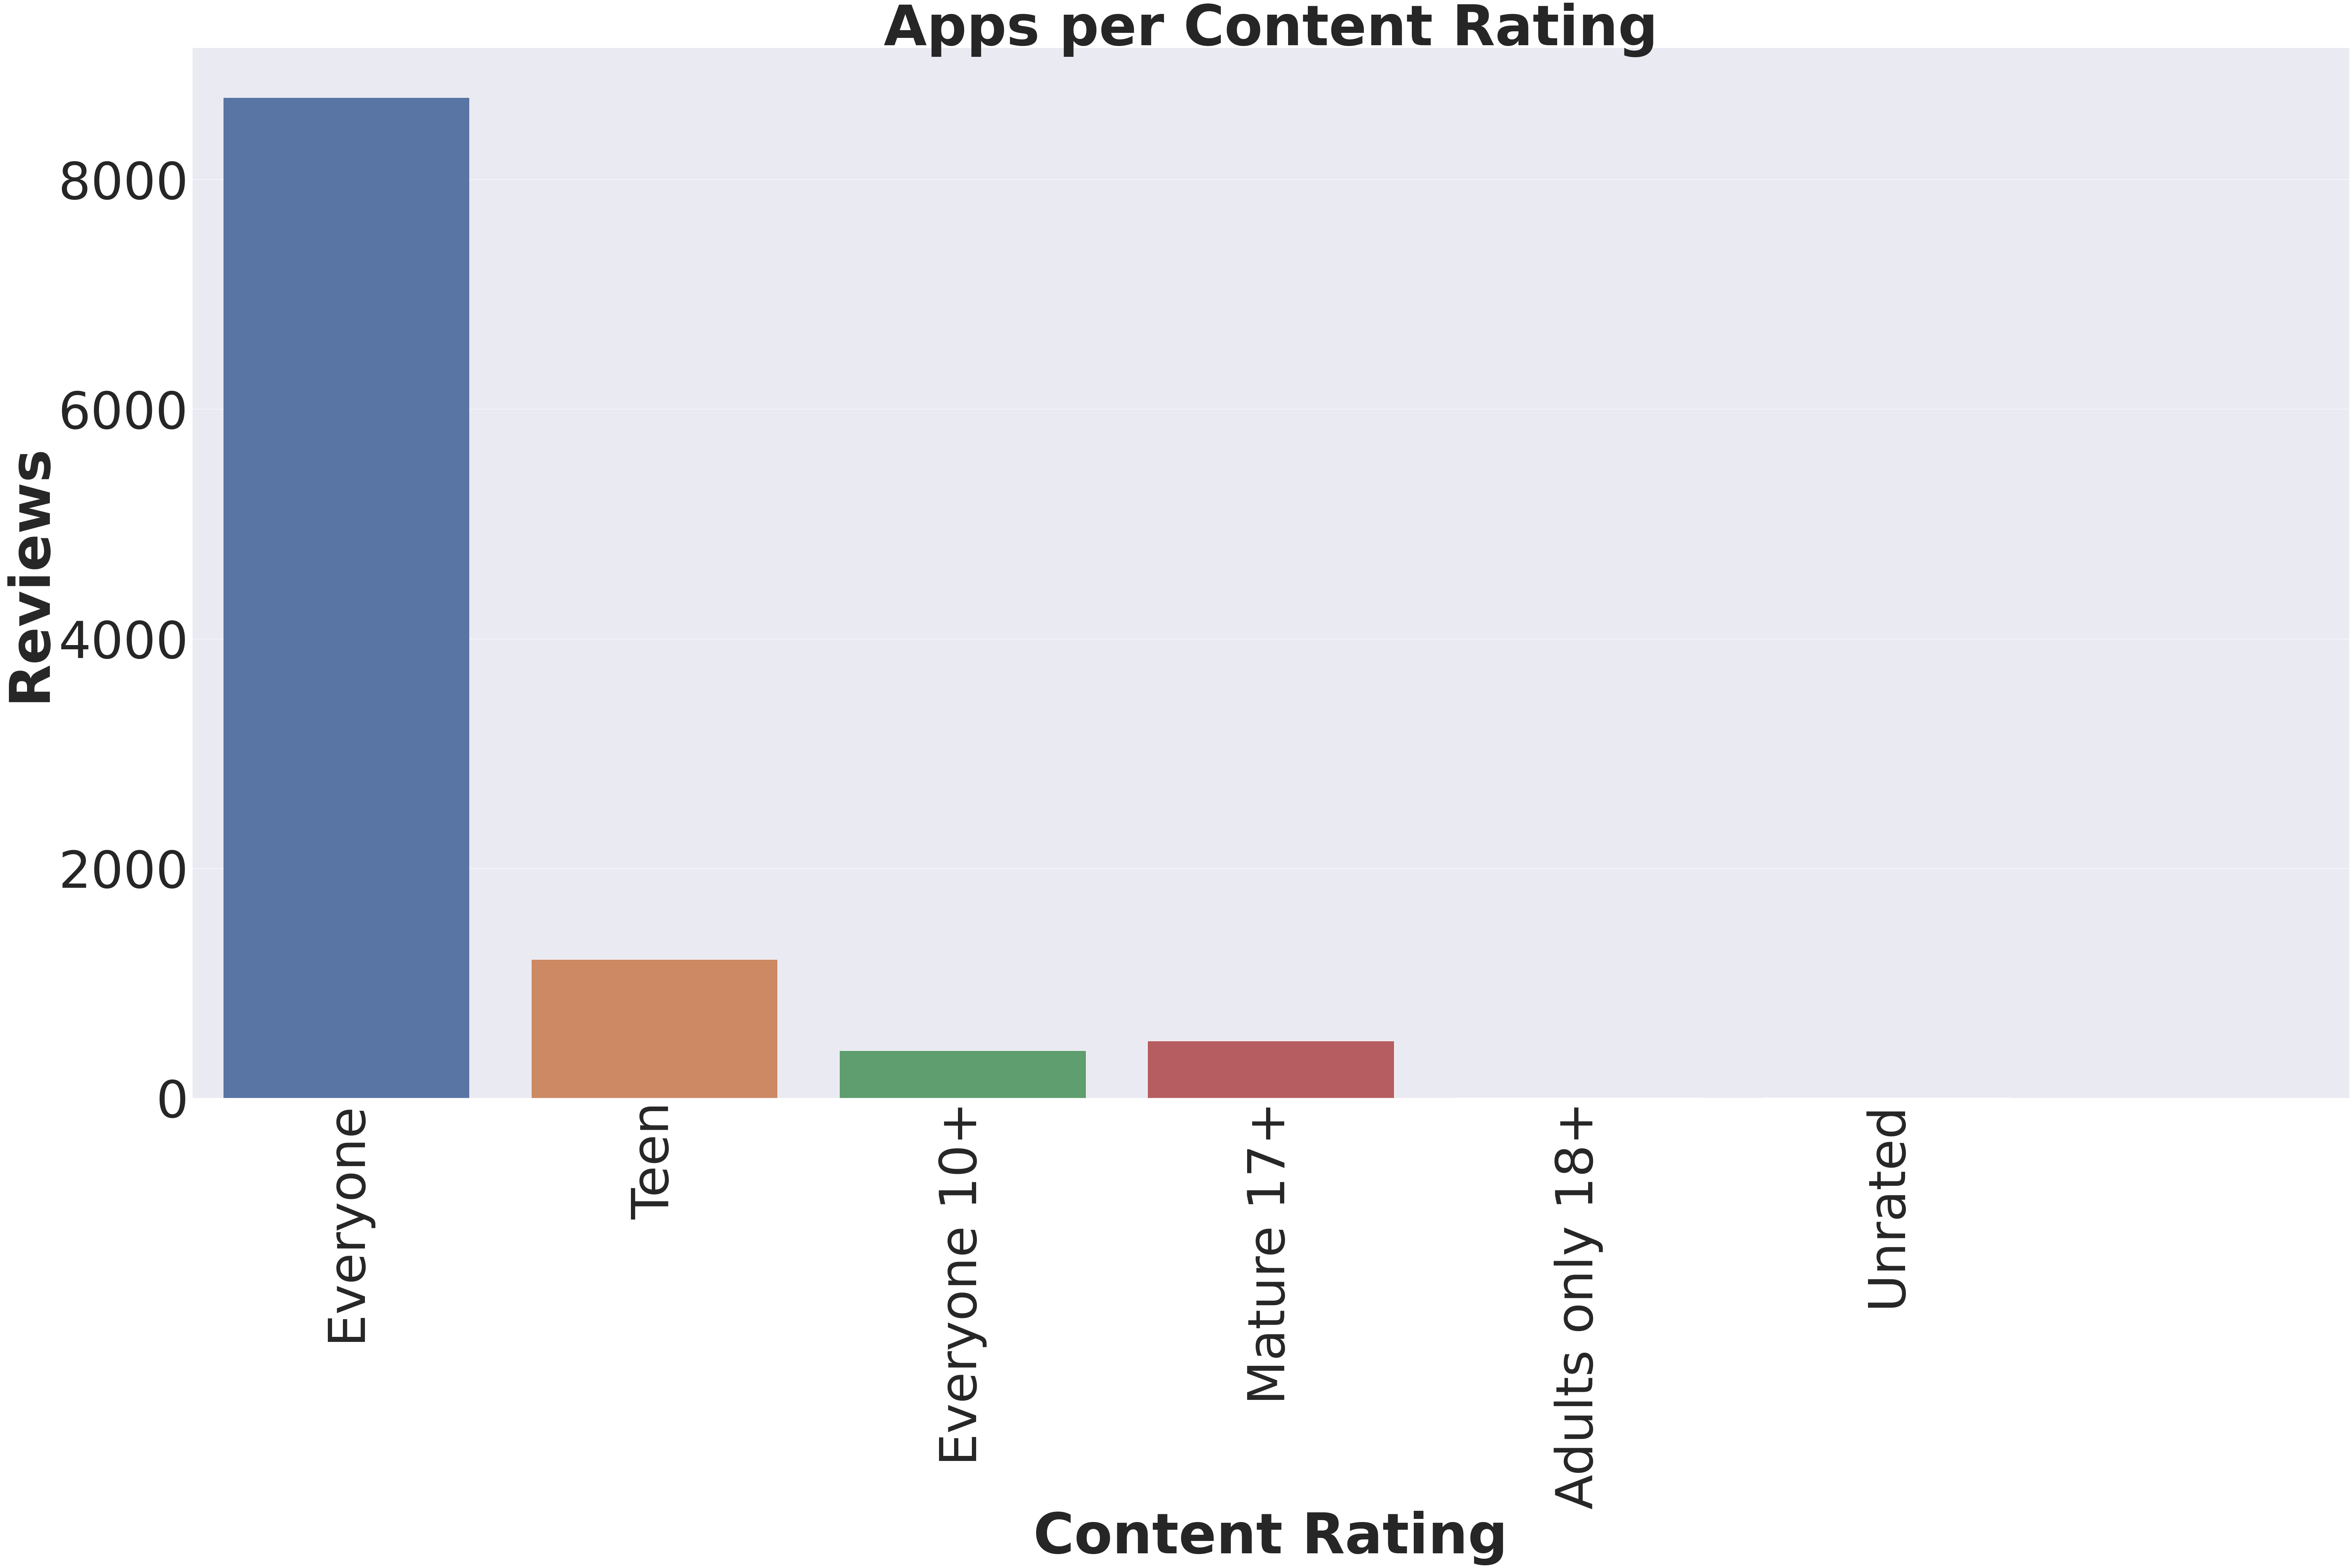

In [10]:
# How many apps are there in each content rating?
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

info = get_data_csv('googleplaystore.csv')
playstore_df = pd.DataFrame(info) # initialize pandas dataframe

plt.figure(figsize=(100,50)) # determine plot size
sns.set(font_scale = 12) # https://www.delftstack.com/howto/seaborn/seaborn-font-size/#:~:text=We%20can%20change%20the%20configurations,the%20axis%20labels%20and%20everything.
c = sns.countplot(playstore_df["Content Rating"]) # initialize plot
plt.title('Apps per Content Rating', weight = 'bold') # 'weight' can make chart and axis titles stand out
plt.xlabel('Content Rating', weight = 'bold')
plt.ylabel('Reviews', weight = 'bold')
# plt.xticks(np.arange(len(playstore_df["Category"].unique())), playstore_df["Category"].unique()) # unnecessary code
c.set_xticklabels(c.get_xticklabels(), rotation = 90) # rotates x-axis labels 90 degrees
c # return plot

Apps that welcome everyone as that does not discourage users from not installing apps. The order of content ratings are ‘Everyone’, ‘Teen’, ’Mature 17+’, ’Everyone 10+’, ’Adults only 18+’, and ’Unrated’.
Two graphs were made, one graph states how many apps were free, and the other states how many are paid for, then each are separated by their content rating. Judging by the resulting graphs, we can conclude that most apps are rated for everyone, so the ‘everyone’ category is gigantic in both. This is most likely because developers want their applications to be received by the largest audience possible, and there is no other content rating that is larger than ‘everyone’.


## Potential Data Science

There are many potential data science applications to be found using this data. When it comes to models for prediction, a model could be generated that takes the parameters of highly rated applications and compares them to the new application to calculate whether or not the new application has a large probability of having a good reception. The model could even be improved to predict the exact rating an application would receive. Then, the model could be applied to allow advertisers to choose well received applications and have their advertisements shown to their target audience. In terms of recommendations, an algorithm could use the parameters of customer ratings and installs, as well as the correlations calculated to recommend certain applications to the front page of the Google Play Store. More specifically, the applications could be run through a clustering algorithm such that users who are willing to install an application in one cluster will be recommended other applications of that same cluster. 

## Conclusion

To conclude, generally, we found that the attributes of the applications available for download on the Google Play Store were honest representations of the applications at the time of the data being web scraped. However, when it comes to applications within the “Family” category, we proposed that developers were found to have been abusing the “Family” category in order to obtain more installations from kids. We conclude this to be true, as most applications are categorized as “Family” yet the amount of reviews made for applications within said category are low. We infer that kids are installing the applications, and may not have the proper english or technological proficiency to leave a review for the application. This could lead to concerns with the reputation of the Google Play Store. For example, parents want to feel safe with letting their children play on their phones, however, if the Google Play Store starts letting developers put non-family friendly material in the “Family” category, parents might start purchasing iPhones instead of Androids. 
***
Another conclusion we came to was that reviews are positively correlated with installations. This correlation allowed us to substitute reviews in place of installations as an issue with the installation number is that a user can install an application but never use it. Users who leave a review on the other hand are much more likely to have interacted with the application as the Google Play Store removes protest reviews, or as they are much more informally known, “brigades”. 
***
However, we could not come to other conclusions that easily. For example, the questions mentioned in the proposal originally were based on the idea of calculating the Pearson's correlation coefficient between many columns, which backfired spectacularly because of the nature of some of the information. Categories like the user rating and the maturity rating are not normal values that can be used in simple calculations, meaning the conclusions had to be drawn through other methods.


One of the big technical issues we ran into was related to graphing. Making graphs with data can be quite simple, but having the graphs be readable let alone clean is tough work. Our first attempts at making graphs were miserable, with the labels being the most irritating part of making a usable graph. Data that brought out problematic graphs usually had many bars.
The first attempt resulted in a bar graph using seaborn that looked alright. However, the labels were extremely tiny, so it was useless. Changing the font size of the labels resulted in the labels overlapping, making it impossible to understand what the graph was displaying. 
The second attempt was made using the idea that the labels would be legible if the bar graph was a horizontal graph instead of a vertical graph. So, the data was turned into a dataframe and a new graph was created using pandas. Unfortunately the labels came out as a complete mess, making another useless graph.
The third attempt used the graph in the first attempt, with the idea of turning the labels 90 degrees like in Assignment 2. The code for making graphs turned some of the labels vertical, making it readable. 
Another method for making usable graphs was making a dictionary with the necessary labels and their respective values. Then, this data can be turned into a pandas series, and graphed using pandas. This method was used for our first question, “Which application has the most reviews?” It returns a graph with the reviews to the power of 10^9, since the values are so large.

<AxesSubplot:ylabel='Category'>

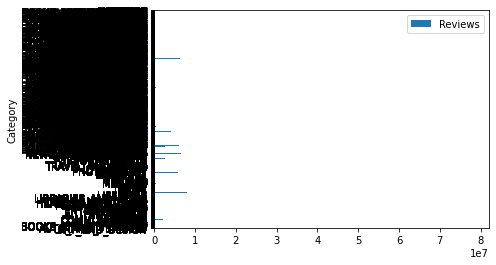

In [6]:
# Attempt No. 2 at making a usable bar graph
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

info = get_data_csv('googleplaystore.csv')

playstore_df = pd.DataFrame(data)
# https://stackoverflow.com/questions/42719749/pandas-convert-string-to-int
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')
# playstore_df
playstore_df.plot.barh('Category','Reviews')